In [56]:
#importing required Python libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [24]:
df = pd.read_csv('covid_19_india.csv')
df.head()

,Date,ConfirmedIndianNational
0,30-01-2020,1
1,31-01-2020,1
2,01-02-2020,1
3,02-02-2020,2
4,03-02-2020,3


In [25]:
df.index = pd.to_datetime(df.Date)
df

,Date,ConfirmedIndianNational
Date,,
2020-01-30,30-01-2020,1
2020-01-31,31-01-2020,1
2020-01-02,01-02-2020,1
2020-02-02,02-02-2020,2
2020-03-02,03-02-2020,3
...,...,...
2020-04-15,15-04-2020,12370
2020-04-16,16-04-2020,13431
2020-04-17,17-04-2020,14353


In [26]:
df = df.drop('Date', axis = 1)
df

,ConfirmedIndianNational
Date,
2020-01-30,1
2020-01-31,1
2020-01-02,1
2020-02-02,2
2020-03-02,3
...,...
2020-04-15,12370
2020-04-16,13431
2020-04-17,14353


In [27]:
df.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-01-02', '2020-02-02',
               '2020-03-02', '2020-04-02', '2020-05-02', '2020-06-02',
               '2020-07-02', '2020-08-02', '2020-09-02', '2020-10-02',
               '2020-11-02', '2020-12-02', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-01-03',
               '2020-02-03', '2020-03-03', '2020-04-03', '2020-05-03',
               '2020-06-03', '2020-07-03', '2020-08-03', '2020-09-03',
               '2020-10-03', '2020-11-03', '2020-12-03', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
      

In [28]:
df['Ticks'] = range(0,len(df.index.values))
df.head()

,ConfirmedIndianNational,Ticks
Date,,
2020-01-30,1,0
2020-01-31,1,1
2020-01-02,1,2
2020-02-02,2,3
2020-03-02,3,4


In [29]:
df.tail() 

,ConfirmedIndianNational,Ticks
Date,,
2020-04-15,12370,76
2020-04-16,13431,77
2020-04-17,14353,78
2020-04-18,15723,79
2020-04-19,17296,80


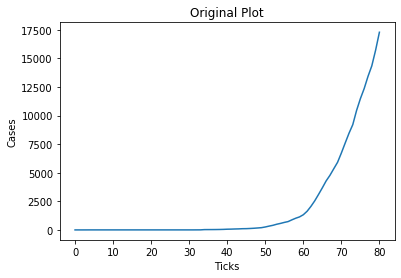

In [30]:
#very simple plotting
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Cases')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'ConfirmedIndianNational', data = df);

In [31]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = pd.Series(ts).rolling(window=12).mean()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

In [32]:
import warnings
warnings.filterwarnings("ignore")

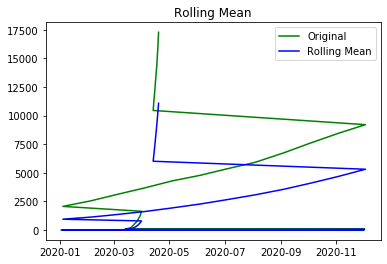

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-1.0005921822614539, 0.753048255054641, 11, 69, {'1%': -3.528889992207215, '5%': -2.9044395987933362, '10%': -2.589655654274312}, 778.6025489731287)
df_output: 
 Test Statistic                 -1.000592
p-value                         0.753048
#Lags Used                     11.000000
Number of Observations Used    69.000000
dtype: float64
Test Statistic                 -1.000592
p-value                         0.753048
#Lags Used                     11.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


In [54]:
stationarity_check(df.ConfirmedIndianNational)

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

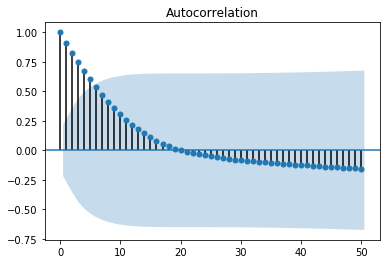

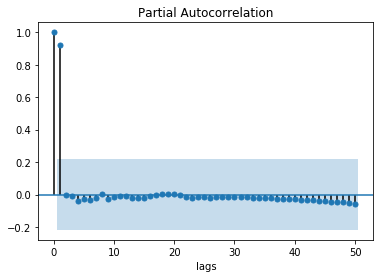

In [53]:
plot_acf(df.ConfirmedIndianNational, lags=50)
plot_pacf(df.ConfirmedIndianNational, lags=50)
plt.xlabel('lags')
plt.show()

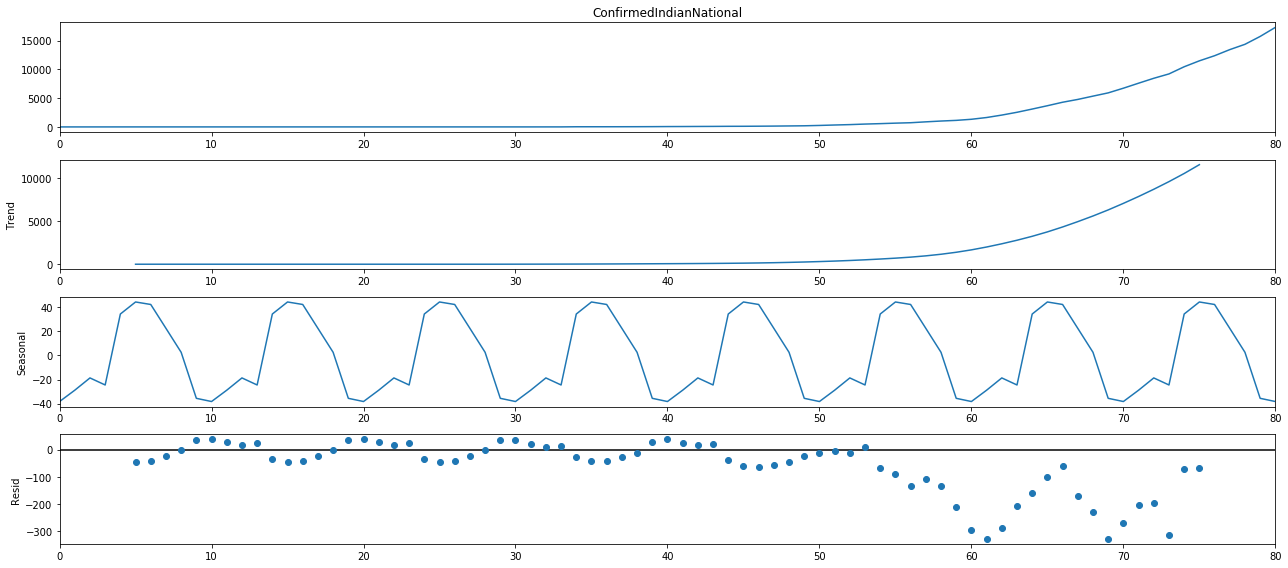

In [74]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df.ConfirmedIndianNational, model='additive', filt=None, freq=10)
fig = decomposition.plot()
plt.show()

In [58]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [59]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.ConfirmedIndianNational,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1580.3971793759297
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1315.8285084085946
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1316.4098717045272
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1068.8155052015068
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1180.7083870406402
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1166.5890346138017
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:986.1965565193855
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:971.944468378428
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1508.934450049725
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1223.0520059099958
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1215.210124699672
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:984.7589195338106
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1096.905262467555
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1069.7494856539581
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:918.6541077287826
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:889.6207302512072
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1186.305679126085
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:990.3432777934474
ARI

In [60]:
mod = sm.tsa.statespace.SARIMAX(df.ConfirmedIndianNational,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0841      0.010    103.635      0.000       1.064       1.105
ma.L1         -0.4530      0.114     -3.959      0.000      -0.677      -0.229
ar.S.L12      -2.0258      0.784     -2.584      0.010      -3.562      -0.489
ma.S.L12       0.0981      0.551      0.178      0.859      -0.983       1.179
sigma2      9154.6840   1459.857      6.271      0.000    6293.417     1.2e+04


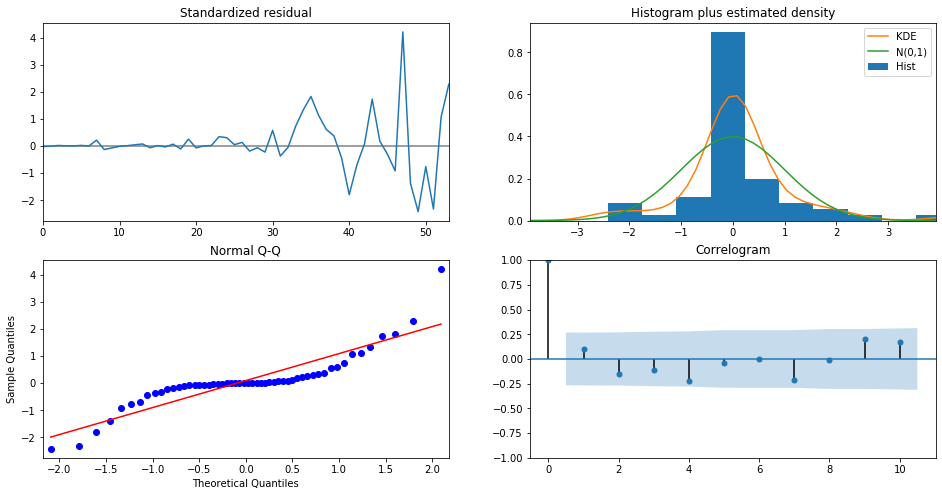

In [61]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [62]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()

In [63]:
pred_ci.head(20)

,lower ConfirmedIndianNational,upper ConfirmedIndianNational
81,18926.032877,19301.092028
82,20484.947270,21202.510681
83,22086.442208,23212.888572
84,24022.854953,25630.115359
85,26472.118888,28635.455349
86,28909.407889,31707.674208
87,31883.971508,35400.231655
88,35382.796301,39704.998308
89,39006.030451,44227.687610
90,43091.389367,49312.268655


In [64]:
pred_ci.to_csv('predictions_2004.csv')

In [65]:
residual = results.get_prediction(dynamic=False)

In [66]:
residual1 = residual.predicted_mean - df.ConfirmedIndianNational

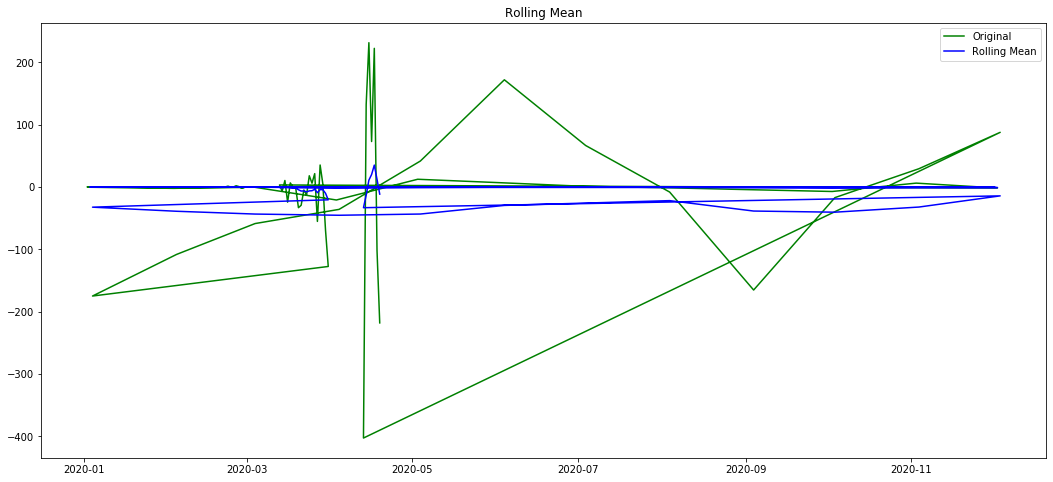

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-1.498724139539625, 0.534142394155862, 12, 68, {'1%': -3.530398990560757, '5%': -2.9050874099328317, '10%': -2.5900010121107266}, 776.266499903805)
df_output: 
 Test Statistic                 -1.498724
p-value                         0.534142
#Lags Used                     12.000000
Number of Observations Used    68.000000
dtype: float64
Test Statistic                 -1.498724
p-value                         0.534142
#Lags Used                     12.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


In [67]:
stationarity_check(residual1)

In [68]:
df = df.reset_index()
y = df['ConfirmedIndianNational']
y

0         1
1         1
2         1
3         2
4         3
      ...  
76    12370
77    13431
78    14353
79    15723
80    17296
Name: ConfirmedIndianNational, Length: 81, dtype: int64